In [85]:
# Imports
import numpy as np
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.backend import clear_session
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint as sp_randint
from keras.layers import LeakyReLU
from sklearn.metrics import make_scorer, cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

from utility3 import load_data, plot_learning_curves, report, plot_lines1

In [86]:
X_train, X_val, X_test, y_train, y_val, y_test, class_names = load_data('motions', scale=True, valset=True)

# KMeans Cluster

km_model = KMeans(n_clusters=23)
km_fit = km_model.fit(X_train)

# Expectation Maximization Cluster
em_model = GaussianMixture(n_components=11)
em_fit = em_model.fit(X_train)

########## BEST FOUND PARAMETERS from HW1 #####
n1 = 75
n2 = 14
mid_act = 'relu' #useleakyrelu is enabled...
num_layers = 3
optimizer = 'adam'
activation = 'sigmoid' 
epo = 100 #10
bat = 44 #18
##############################################



motions shapes: (11678, 64), (11678, 1)


In [87]:

X_train_km = km_fit.transform(X_train)
X_train_km.shape
X_val_km = km_fit.transform(X_val)
X_test_km = km_fit.transform(X_test)

In [88]:
# Extract pseudo-DR Data

pca_m_data = np.load('pca_m_data.npy')
pca2_m_data = np.load('pca2_m_data.npy')
ica_m_data = np.load('ica_m_data.npy')
rca_m_data = np.load('rca_m_data.npy')
tsne_m_data = np.load('ica_m_tsne_X.npy')  #np.load('X_tsne_m_set.npy')


[pca_y2_val_gm, pca2_y2_val_gm, ica_y2_val_gm, rca_y2_val_gm] = np.load('motions_val_em.npy')
[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = np.load('motions_em.npy')

[X_pca_m, X_val_pca_m, pca_m] = pca_m_data
[X_pca2_m, X_val_pca2_m, pca2_m] = pca2_m_data
[X_ica_m, X_val_ica_m, ica_m] = ica_m_data
[X_rca_m, X_val_rca_m, rca_m] = rca_m_data
X_tsne_m = tsne_m_data

#Scale it
scaler_ica = StandardScaler()
X_ica_m_scaled = scaler_ica.fit_transform(X_ica_m)
X_val_ica_m_scaled = scaler_ica.transform(X_val_ica_m)
scaler_tsne = StandardScaler()
X_tsne_m_scaled = scaler_tsne.fit_transform(X_tsne_m)

Fit time = 19.604999780654907
Pred time = 19.646999835968018
rock accuracy =   0.8867
paper accuracy =   0.5675
scissors accuracy =   0.5771
okay accuracy =   0.4846
Cohen Kappa: 0.5043346463768813
Accuracy: 0.628143392188336
F1 Score: 0.6359926077753543
Precision: 0.6556849644469583
Recall: 0.628143392188336

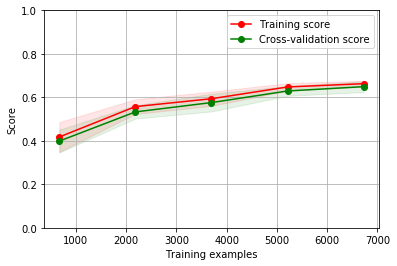

time elapsed: 866.949000120163


In [31]:
km_nn_model = finalModel(X_train_km, y_train, X_val_km, y_val, learning_curves=True)

In [89]:
# Extract pseudo DR Data for Gaussian Mixture / Expectation Maximization

X_train_gm = em_fit.predict_proba(X_train)
X_train_gm.shape
X_val_gm = em_fit.predict_proba(X_val)
X_test_gm = em_fit.predict_proba(X_test)

Fit time = 27.852784872055054
Pred time = 27.898789644241333
rock accuracy =   0.9782
paper accuracy =   0.9810
scissors accuracy =   0.9229
okay accuracy =   0.8158


Cohen Kappa: 0.9000819094642662
Accuracy: 0.9250936329588015
F1 Score: 0.9258495726267777
Precision: 0.9298847625236499
Recall: 0.9250936329588015


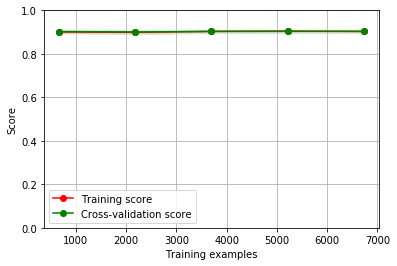

time elapsed: 969.3095459938049


In [33]:
em_nn_model = finalModel(X_train_gm, y_train, X_val_gm, y_val, learning_curves=True)

In [15]:
param_range = range(2, 64)

km_results = []
for param in param_range:
    km_model = KMeans(n_clusters=param)
    km_fit = km_model.fit(X_train)
    X_train_km = km_fit.transform(X_train)
    X_val_km = km_fit.transform(X_val)
    km_nn_model_results = finalModel(X_train_km, y_train, X_val_km, y_val, learning_curves=False)
    km_nn_model_results['param'] = param
    km_results.append(km_nn_model_results)
    print('finished param {}'.format(param))

Cohen Kappa: 0.3054267677985446
time elapsed: 29.087599754333496
finished param 2


Cohen Kappa: 0.31579943952132095
time elapsed: 26.14300012588501
finished param 3


Cohen Kappa: 0.3568735029269716
time elapsed: 22.213800191879272
finished param 4


Cohen Kappa: 0.4166319433315171
time elapsed: 20.65779995918274
finished param 5


Cohen Kappa: 0.4471346167736965
time elapsed: 19.61419987678528
finished param 6


Cohen Kappa: 0.41591209324581435
time elapsed: 19.68059992790222
finished param 7


Cohen Kappa: 0.4529355458114809
time elapsed: 20.456400156021118
finished param 8


Cohen Kappa: 0.5035093814750984
time elapsed: 20.947199821472168
finished param 9


Cohen Kappa: 0.4791692708184012
time elapsed: 20.297199964523315
finished param 10


Cohen Kappa: 0.4985803553233241
time elapsed: 20.33739972114563
finished param 11


Cohen Kappa: 0.522476280606639
time elapsed: 20.317800045013428
finished param 12


Cohen Kappa: 0.5565038264545801
time elapsed: 20.606199741363525
finished param 13


Cohen Kappa: 0.550404131118096
time elapsed: 21.368599891662598


finished param 14


Cohen Kappa: 0.5411913291555253
time elapsed: 21.78380012512207
finished param 15


Cohen Kappa: 0.5375834305998297
time elapsed: 23.37000012397766
finished param 16


Cohen Kappa: 0.5787795757886208
time elapsed: 21.93780016899109
finished param 17


Cohen Kappa: 0.6024209163506377
time elapsed: 21.134400129318237
finished param 18


Cohen Kappa: 0.584721846810733
time elapsed: 21.18879985809326
finished param 19


Cohen Kappa: 0.560047446370215
time elapsed: 21.452199935913086
finished param 20


Cohen Kappa: 0.5114693182286492
time elapsed: 24.569000005722046
finished param 21


Cohen Kappa: 0.5552890519024152
time elapsed: 21.092999935150146
finished param 22


Cohen Kappa: 0.5567736192530695
time elapsed: 22.3951997756958
finished param 23


Cohen Kappa: 0.5737719547131129
time elapsed: 22.802599906921387
finished param 24


Cohen Kappa: 0.5661554911311981
time elapsed: 21.815399885177612
finished param 25


Cohen Kappa: 0.0
time elapsed: 21.236000061035156
finished param 26


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Cohen Kappa: 0.5777700052751084
time elapsed: 21.21459984779358
finished param 27


Cohen Kappa: 0.5145710049016243
time elapsed: 20.61459994316101
finished param 28


Cohen Kappa: 0.5477077961996164
time elapsed: 22.494199752807617
finished param 29


Cohen Kappa: 0.5522263703513803
time elapsed: 22.70860004425049
finished param 30


Cohen Kappa: 0.0
time elapsed: 21.79200005531311
finished param 31


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Cohen Kappa: 0.5410212685873499
time elapsed: 21.01359987258911
finished param 32


Cohen Kappa: 0.5651759835792209
time elapsed: 21.525399923324585
finished param 33


Cohen Kappa: 0.5133398716426643
time elapsed: 20.85859990119934
finished param 34


Cohen Kappa: 0.5196700964887697
time elapsed: 21.24460005760193
finished param 35


Cohen Kappa: 0.5543516265078887
time elapsed: 21.138400077819824
finished param 36


Cohen Kappa: 0.5847786311206962


time elapsed: 24.886600017547607
finished param 37


Cohen Kappa: 0.5595883845374243
time elapsed: 24.206799745559692
finished param 38


Cohen Kappa: 0.5357494158891898
time elapsed: 23.016000032424927
finished param 39


Cohen Kappa: 0.5643012000261398
time elapsed: 22.369400024414062
finished param 40


Cohen Kappa: 0.519892866507959
time elapsed: 20.859400033950806
finished param 41


Cohen Kappa: 0.44623615936450045
time elapsed: 21.566400051116943
finished param 42


Cohen Kappa: 0.5226927079164332
time elapsed: 21.58300018310547
finished param 43


Cohen Kappa: 0.5631381730333339
time elapsed: 24.83179998397827
finished param 44


Cohen Kappa: 0.5186176849691728
time elapsed: 22.45080018043518
finished param 45


Cohen Kappa: 0.5018713696458352
time elapsed: 18.763999938964844
finished param 46


Cohen Kappa: 0.5182621265660134
time elapsed: 19.22860026359558
finished param 47


Cohen Kappa: 0.5256288967401836
time elapsed: 21.643400192260742
finished param 48


Cohen Kappa: 0.4803234260117676
time elapsed: 22.452800035476685
finished param 49


Cohen Kappa: 0.49347447447103565
time elapsed: 18.49500012397766
finished param 50


Cohen Kappa: 0.49087034203167945
time elapsed: 18.60859990119934
finished param 51


Cohen Kappa: 0.5430043748803699
time elapsed: 19.73580002784729
finished param 52


Cohen Kappa: 0.47288730615749863
time elapsed: 18.765199899673462
finished param 53


Cohen Kappa: 0.5396562271595208
time elapsed: 18.98099994659424
finished param 54


Cohen Kappa: 0.5135028214251723
time elapsed: 18.633399963378906
finished param 55


Cohen Kappa: 0.508417373458819
time elapsed: 18.792400121688843
finished param 56


Cohen Kappa: 0.49694041055274474
time elapsed: 18.997400045394897
finished param 57


Cohen Kappa: 0.5446819380978947
time elapsed: 18.99459981918335
finished param 58


Cohen Kappa: 0.4708753018519709
time elapsed: 19.63580012321472
finished param 59


Cohen Kappa: 0.46006633381456064
time elapsed: 19.432999849319458
finished param 60


Cohen Kappa: 0.37099803465568615
time elapsed: 19.055000066757202
finished param 61


Cohen Kappa: 0.4744468495848646
time elapsed: 18.135200023651123
finished param 62


Cohen Kappa: 0.0


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


time elapsed: 26.44422745704651
finished param 63


In [17]:
# unpack my sloppy mess
cohen_kappas = []
accuracies = []
ok_score = []
rock_score = []
paper_score = []
scissors_score = []
fit_times = []
pred_times = []

for result in km_results:
    cohen_kappas.append(result['cohen_kappa'])
    accuracies.append(result['accuracy'])
    ok_score.append(result['okay_accuracy'])
    rock_score.append(result['rock_accuracy'])
    paper_score.append(result['paper_accuracy'])
    scissors_score.append(result['scissors_accuracy'])
    fit_times.append(result['fit_time'])
    pred_times.append(result['pred_time'])

#np.save('kmeans_results', [param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times])

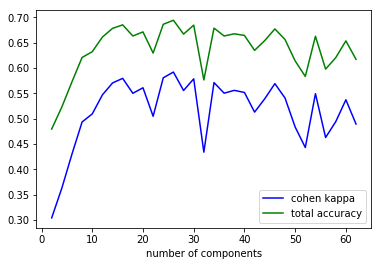

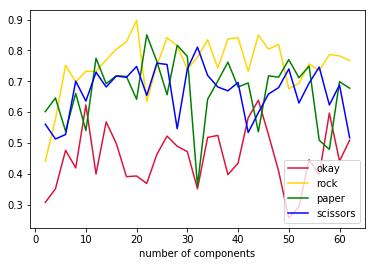

In [37]:
[param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times] = np.load('kmeans_results.npy')

plt.plot(param_range, cohen_kappas, label="cohen kappa", color='blue')
plt.plot(param_range, accuracies, label='total accuracy', color='green')
plt.xlabel('number of components')
plt.legend()
plt.show()

plt.plot(param_range, ok_score, label = 'okay', color="crimson")
plt.plot(param_range, rock_score, label = 'rock', color="gold")
plt.plot(param_range, paper_score, label = 'paper', color="green")
plt.plot(param_range, scissors_score, label = 'scissors', color="blue")
plt.xlabel('number of components')
plt.legend()
plt.show()

In [44]:
a = np.where(cohen_kappas == max(cohen_kappas))
#a = cohen_kappas.index(max(cohen_kappas))
print("max cohen kappa of {m:.4f} at {p} for motions".format(m=max(cohen_kappas), p=param_range[a]))

max cohen kappa of 0.5918 at [26.] for motions


In [27]:
param_range = range(2, 64)

em_results = []
for param in param_range:
    em_model = GaussianMixture(n_components=param)
    em_fit = em_model.fit(X_train)
    X_train_gm = em_fit.predict_proba(X_train)
    X_val_gm = em_fit.predict_proba(X_val)
    em_nn_model_results = finalModel(X_train_gm, y_train, X_val_gm, y_val, learning_curves=False)
    em_nn_model_results['param'] = param
    em_results.append(em_nn_model_results)
    print('finished param {}'.format(param))

Cohen Kappa: 0.3301013964895584
time elapsed: 17.14041042327881
finished param 2


Cohen Kappa: 0.6536682574413222
time elapsed: 17.364356756210327
finished param 3


Cohen Kappa: 0.7727753398953533
time elapsed: 17.18635129928589
finished param 4


Cohen Kappa: 0.8993667101232441
time elapsed: 17.10154676437378
finished param 5


Cohen Kappa: 0.9536268296760806
time elapsed: 17.188746690750122
finished param 6


Cohen Kappa: 0.9072087110844287
time elapsed: 17.074957847595215
finished param 7


Cohen Kappa: 0.9014481190958454
time elapsed: 17.14195227622986
finished param 8


Cohen Kappa: 0.9579068033700209
time elapsed: 17.10375690460205
finished param 9


Cohen Kappa: 0.9072172152792018
time elapsed: 17.725170135498047
finished param 10


Cohen Kappa: 0.9607546919131644
time elapsed: 17.797362565994263
finished param 11


Cohen Kappa: 0.9593316422064053
time elapsed: 17.597959995269775
finished param 12


Cohen Kappa: 0.9257841449403852
time elapsed: 18.086378574371338
finished param 13


Cohen Kappa: 0.9407848930420045
time elapsed: 17.71156358718872
finished param 14


Cohen Kappa: 0.884394930723554
time elapsed: 18.17794156074524
finished param 15


Cohen Kappa: 0.9507626085841
time elapsed: 18.045344591140747
finished param 16


Cohen Kappa: 0.9279200330828067
time elapsed: 18.669749975204468
finished param 17


Cohen Kappa: 0.922922361038241
time elapsed: 19.62396216392517
finished param 18


Cohen Kappa: 0.9222191932705348
time elapsed: 17.995543956756592
finished param 19


Cohen Kappa: 0.9422061375128127
time elapsed: 17.68533754348755
finished param 20


Cohen Kappa: 0.9550536964552782
time elapsed: 18.583157539367676
finished param 21


Cohen Kappa: 0.9007619591138859
time elapsed: 18.265541553497314
finished param 22


Cohen Kappa: 0.9507745617611089
time elapsed: 17.269734144210815
finished param 23


Cohen Kappa: 0.9136648708574989
time elapsed: 17.40179991722107
finished param 24


Cohen Kappa: 0.8922386093530743
time elapsed: 17.297800064086914
finished param 25


Cohen Kappa: 0.8643659563936035
time elapsed: 17.6173996925354
finished param 26


Cohen Kappa: 0.8650151668351871
time elapsed: 17.288999795913696
finished param 27


Cohen Kappa: 0.8686828418906225
time elapsed: 17.950200080871582
finished param 28


Cohen Kappa: 0.9243821223113847
time elapsed: 17.93079972267151
finished param 29


Cohen Kappa: 0.880777300692938
time elapsed: 18.03600001335144
finished param 30


Cohen Kappa: 0.880132346423291
time elapsed: 26.30399990081787
finished param 31


Cohen Kappa: 0.8936387427356225
time elapsed: 28.79419994354248
finished param 32


Cohen Kappa: 0.8807844044949485
time elapsed: 24.38100004196167
finished param 33


Cohen Kappa: 0.8700916001672748
time elapsed: 21.490000247955322
finished param 34


Cohen Kappa: 0.8049065018548215


time elapsed: 20.91540002822876
finished param 35


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Cohen Kappa: 0.8427987466107566
time elapsed: 20.40000009536743
finished param 36


Cohen Kappa: 0.892928221233554
time elapsed: 18.714400053024292
finished param 37


Cohen Kappa: 0.8785792244478685
time elapsed: 19.30139970779419
finished param 38


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Cohen Kappa: 0.890067305731185
time elapsed: 25.041069984436035
finished param 39


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Cohen Kappa: 0.8556980720145121
time elapsed: 22.555341720581055
finished param 40


Cohen Kappa: 0.8571487533190558
time elapsed: 23.932708978652954


finished param 41


Cohen Kappa: 0.8012316718234986
time elapsed: 18.72737455368042
finished param 42


Cohen Kappa: 0.8177595662892193
time elapsed: 18.90519905090332
finished param 43


Cohen Kappa: 0.8693041453681721
time elapsed: 19.148592233657837
finished param 44


Cohen Kappa: 0.8821922926174066
time elapsed: 19.4585702419281
finished param 45


Cohen Kappa: 0.8299988305354085
time elapsed: 17.947501182556152
finished param 46


Cohen Kappa: 0.804106036263484
time elapsed: 21.34151029586792
finished param 47


Cohen Kappa: 0.8736651440630488
time elapsed: 21.617161512374878
finished param 48


Cohen Kappa: 0.7919181229899754
time elapsed: 23.03930377960205
finished param 49


Cohen Kappa: 0.8427913538685645
time elapsed: 22.557255744934082
finished param 50


Cohen Kappa: 0.8758230579955187
time elapsed: 23.296329498291016
finished param 51


Cohen Kappa: 0.8592902314532439
time elapsed: 23.878387451171875
finished param 52


Cohen Kappa: 0.809840843632024
time elapsed: 21.58915901184082
finished param 53


Cohen Kappa: 0.819236803354267
time elapsed: 21.00510025024414
finished param 54


Cohen Kappa: 0.8313688293605508
time elapsed: 19.93099284172058
finished param 55


Cohen Kappa: 0.8278794423561268
time elapsed: 19.00990080833435
finished param 56


Cohen Kappa: 0.8184438271796161
time elapsed: 18.719871759414673
finished param 57


Cohen Kappa: 0.8578608910794602
time elapsed: 19.587958574295044
finished param 58


Cohen Kappa: 0.8450419285769959
time elapsed: 20.005000591278076
finished param 59


Cohen Kappa: 0.8371101745936183


time elapsed: 25.074507236480713
finished param 60


Cohen Kappa: 0.7776361046809888


time elapsed: 36.77999997138977
finished param 61


Cohen Kappa: 0.8586176266640687
time elapsed: 37.07699990272522


finished param 62


Cohen Kappa: 0.8464887650107388
time elapsed: 19.572999715805054
finished param 63


In [27]:
# unpack my sloppy mess
cohen_kappas = []
accuracies = []
ok_score = []
rock_score = []
paper_score = []
scissors_score = []
fit_times = []
pred_times = []

for result in em_results:
    cohen_kappas.append(result['cohen_kappa'])
    accuracies.append(result['accuracy'])
    ok_score.append(result['okay_accuracy'])
    rock_score.append(result['rock_accuracy'])
    paper_score.append(result['paper_accuracy'])
    scissors_score.append(result['scissors_accuracy'])
    fit_times.append(result['fit_time'])
    pred_times.append(result['pred_time'])

#np.save('em_results', [param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times])

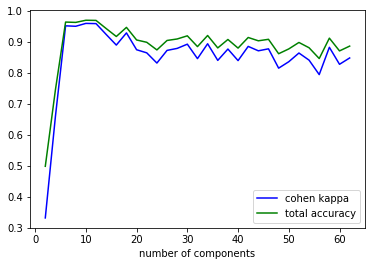

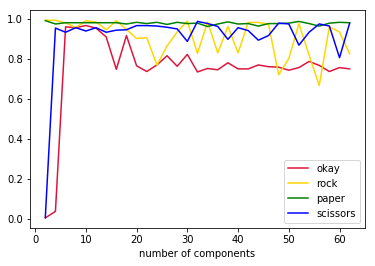

In [91]:
[param_range, cohen_kappas, accuracies, ok_score, rock_score, paper_score, scissors_score, fit_times, pred_times] = np.load('em_results.npy')

plt.plot(param_range, cohen_kappas, label="cohen kappa", color='blue')
plt.plot(param_range, accuracies, label='total accuracy', color='green')
plt.xlabel('number of components')
plt.legend()
plt.show()

plt.plot(param_range, ok_score, label = 'okay', color="crimson")
plt.plot(param_range, rock_score, label = 'rock', color="gold")
plt.plot(param_range, paper_score, label = 'paper', color="green")
plt.plot(param_range, scissors_score, label = 'scissors', color="blue")
plt.xlabel('number of components')
plt.legend()
plt.show()

In [101]:
max(cohen_kappas)
print(np.where(cohen_kappas == max(cohen_kappas)))
param_range[4]
#print("max cohen kappa of {m:.4f} at {p} for motions, EM".format(m=max(cohen_kappas), p=param_range[a]))

(array([4], dtype=int64),)


10.0

Fit time = 24.707600116729736
Pred time = 24.738800048828125
rock accuracy =   0.9869
paper accuracy =   0.9810
scissors accuracy =   0.9021
okay accuracy =   0.9605
Cohen Kappa: 0.9429358497738157
Accuracy: 0.9571963616907437
F1 Score: 0.9572484617877159
Precision: 0.9581831598355997
Recall: 0.9571963616907437


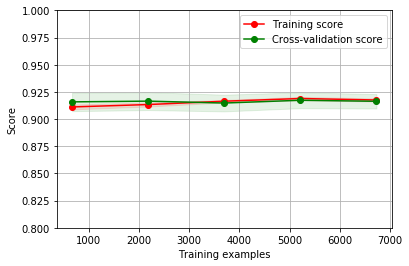

time elapsed: 1092.3656070232391


In [106]:
em_model = GaussianMixture(n_components=11)
em_fit = em_model.fit(X_train)
X_train_gm = em_fit.predict_proba(X_train)
X_val_gm = em_fit.predict_proba(X_val)
em_nn_model_results = finalModel(X_train_gm, y_train, X_val_gm, y_val, learning_curves=True)

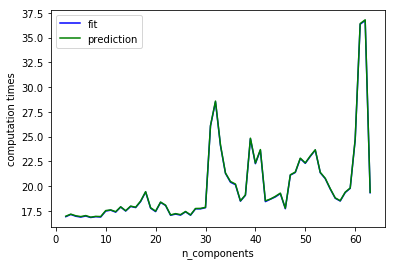

In [27]:
plt.plot(param_range, fit_times, label="fit", color='blue')
plt.plot(param_range, pred_times, label='prediction', color='green')
plt.xlabel('n_components')
plt.ylabel('computation times')
plt.legend()
plt.show()

In [ ]:
model_tsne = finalModel(X_tsne_km, y_train, X_tsne_km, y_train, learning_curves=False)

NameError: name 'X_tsne_km' is not defined

NameError: name 'pca_m_data' is not defined

In [79]:
#km_y = [pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m]
#em_y = [pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m]
#km_y_val = [pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m]

em_y = [pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m]
gm_y_val = [pca_y2_val_gm, pca2_y2_val_gm, ica_y2_val_gm, rca_y2_val_gm]

#km_y_fix = [a.reshape(7473, 1) for a in km_y]
em_y_fix = [a.reshape(7473, 1) for a in em_y]
#km_y_val_fix = [a.reshape(-1, 1) for a in km_y_val]
gm_y_val_fix = [a.reshape(-1, 1) for a in gm_y_val]

#[pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m] = km_y_fix
[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = em_y_fix
#[pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m] = km_y_val_fix
[pca_y_val_gm, pca2_y_val_gm, ica_y_val_gm, rca_y_val_gm] = gm_y_val_fix

X_pca_gm = np.concatenate((X_pca_m, pca_y2_m), axis=1)
X_pca2_gm = np.concatenate((X_pca2_m, pca2_y2_m), axis=1)
X_ica_gm = np.concatenate((X_ica_m, ica_y2_m), axis = 1)
X_rca_gm = np.concatenate((X_rca_m, rca_y2_m), axis = 1)
X_tsne_gm = np.concatenate((X_tsne_m, tsne_y2_m), axis = 1)

X_val_pca_gm = np.concatenate((X_val_pca_m, pca_y_val_gm), axis=1)
X_val_pca2_gm = np.concatenate((X_val_pca2_m, pca2_y_val_gm), axis=1)
X_val_ica_gm = np.concatenate((X_val_ica_m, ica_y_val_gm), axis = 1)
X_val_rca_gm = np.concatenate((X_val_rca_m, rca_y_val_gm), axis = 1)
#X_val_tsne_gm = np.concatenate((X_tsne_m, tsne_y_val_gm), axis = 1)

In [ ]:
X_train_list_gm = [X_pca_gm, X_pca2_gm, X_ica_gm, X_rca_gm]
X_val_list_gm = [X_val_pca_gm, X_val_pca2_gm, X_val_ica_gm, X_val_rca_gm]
name_list = ['pca-gm', 'pca2-gm', 'ica-gm', 'rca-gm']
model_results_gm=[]

i = 0
for X_train, X_val in zip(X_train_list_gm, X_val_list_gm):
    print("Running {}".format(name_list[i]))
    print("----------------------------------")
    model = finalModel(X_train, y_train, X_val, y_val, learning_curves=False, verbose=True)
    model_results_gm.append(model)
    i = i + 1
    print("----------------------------------")

Running pca-gm
----------------------------------


Cohen Kappa: 0.5414112205575308
time elapsed: 24.067400217056274
----------------------------------
Running pca2-gm
----------------------------------


KeyboardInterrupt: 

In [ ]:
scaler_tsne2 = StandardScaler()
X_tsne_gm_scaled = scaler_tsne2.fit_transform(X_tsne_gm)


tsne_model = finalModel(X_tsne_gm, y_train, X_tsne_gm, y_val, learning_curves=False)
tsne_model_scaled = finalModel(X_tsne_gm_scaled, y_train, X_tsne_gm_scaled, y_val, learning_curves=False)

NameError: name 'X_tsne_gm' is not defined

In [10]:
#Build the model
useLeakyReLU = True  # as an "advanced" activation function, it must be added as its own layer not as a parameter on another layer

if useLeakyReLU == False:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, num_layers = num_layers, optimizer = optimizer, activation = activation):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim, activation=mid_act))
        model.add(Dense(n2, activation=mid_act))
        for i in range(num_layers-2):
            model.add(Dense(n3, activation=mid_act))
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model
else:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, num_layers = num_layers, optimizer = optimizer, activation = activation):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim))
        model.add(LeakyReLU())
        model.add(Dense(n2))
        model.add(LeakyReLU())
        for i in range(num_layers-2):
            model.add(Dense(n3))
            model.add(LeakyReLU())
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

#model = KerasClassifier(build_fn=classification_model, epochs=epo, batch_size=bat, verbose=0)

scorer = make_scorer(cohen_kappa_score)

Fit time = 20.709800004959106
Pred time = 20.75659990310669
rock accuracy =   0.8824
paper accuracy =   0.8143
scissors accuracy =   0.7229
okay accuracy =   0.7368
Cohen Kappa: 0.7182351122662789
Accuracy: 0.7886570358480471
F1 Score: 0.7894864480365962
Precision: 0.7911094146005148
Recall: 0.7886570358480471


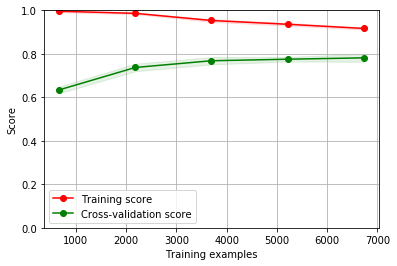

time elapsed: 827.1396040916443


In [6]:
#Truncated PCA
pca_model = finalModel(X_pca_m, y_train, X_val_pca_m, y_val, learning_curves=True)

Fit time = 22.297800302505493
Pred time = 22.323800325393677
rock accuracy =   0.9608
paper accuracy =   0.9451
scissors accuracy =   0.9021
okay accuracy =   0.9123
Cohen Kappa: 0.9065475031775658
Accuracy: 0.9299090422685928
F1 Score: 0.9298101928157596
Precision: 0.9300004542585112
Recall: 0.9299090422685928


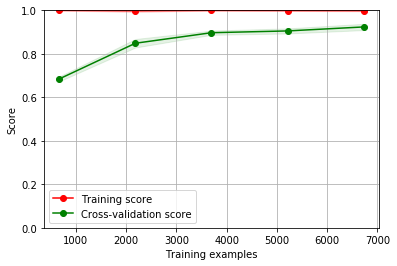

time elapsed: 777.7676043510437


In [7]:
clear_session() #clear the keras session - omg so important!!!!
# #Full PCA
pca2_model = finalModel(X_pca2_m, y_train, X_val_pca2_m, y_val, learning_curves=True)

Fit time = 22.505000352859497
Pred time = 22.55400013923645
rock accuracy =   0.9564
paper accuracy =   0.9451
scissors accuracy =   0.9062
okay accuracy =   0.8816
Cohen Kappa: 0.896545642571408
Accuracy: 0.922418405564473
F1 Score: 0.9224053730602458
Precision: 0.9224056521441175
Recall: 0.922418405564473


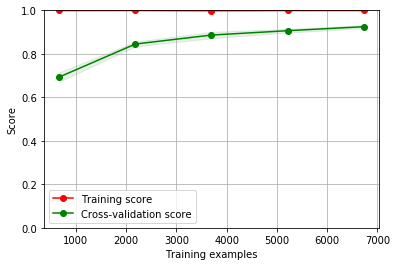

time elapsed: 937.7464048862457


In [9]:
clear_session() #clear the keras session - omg so important!!!!
#Base
base_model = finalModel(X_train, y_train, X_val, y_val, learning_curves=True)

Fit time = 22.701200246810913
Pred time = 22.75000023841858
rock accuracy =   0.9194
paper accuracy =   0.9451
scissors accuracy =   0.8771
okay accuracy =   0.8640
Cohen Kappa: 0.8687399807630651
Accuracy: 0.9015516318887106
F1 Score: 0.901369577081614
Precision: 0.9022480962694509
Recall: 0.9015516318887106


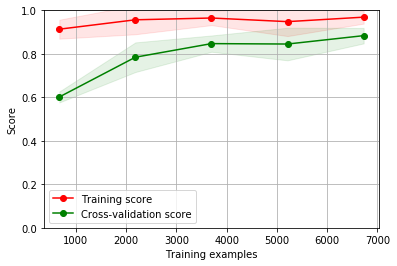

time elapsed: 904.345803976059


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# ICA
ica_model = finalModel(X_ica_m, y_train, X_val_ica_m, y_val, learning_curves=True)

Fit time = 21.313600301742554
Pred time = 21.36240029335022
rock accuracy =   0.9150
paper accuracy =   0.8903
scissors accuracy =   0.8417
okay accuracy =   0.8421
Cohen Kappa: 0.8295087485873216
Accuracy: 0.8721241305510968
F1 Score: 0.8716247454844681
Precision: 0.8717783358626454
Recall: 0.8721241305510968


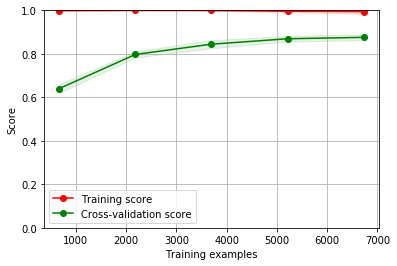

time elapsed: 953.9480037689209


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# RCA
rca_model = finalModel(X_rca_m, y_train, X_val_rca_m, y_val, learning_curves=True)

In [84]:
clear_session() #clear the keras session - omg so important!!!!
# TSNE
tsne_model = finalModel(X_tsne_m, y_train, X_tsne_m, y_train, learning_curves=True)

Fit time = 22.22440004348755
Pred time = 22.318000078201294
rock accuracy =   0.6862
paper accuracy =   0.6233


scissors accuracy =   0.3369
okay accuracy =   0.7064
Cohen Kappa: 0.45163119197870516
Accuracy: 0.5889201124046568
F1 Score: 0.5914012724567983
Precision: 0.635441315895162
Recall: 0.5889201124046568


KeyboardInterrupt: 

In [17]:
print('yippie kai yai yay!')

yippie kai yai yay!


In [104]:
# Final Model
#finalModel = True
def finalModel(X_train, y_train, X_test, y_test, learning_curves = True, 
               classification_model=classification_model, class_names=class_names,
               verbose=True):
    clear_session()
    model_results = defaultdict(float)
    ########## BEST FOUND PARAMETERS from HW1 #####
    n1 = 75
    n2 = 14
    mid_act = 'relu' #useleakyrelu is enabled...
    num_layers = 3
    optimizer = 'adam'
    activation = 'sigmoid' 
    epo = 100 #10
    bat = 44 #18
    ##############################################
    t0 = time.time()
    best_model = KerasClassifier(build_fn=classification_model, input_dim=X_train.shape[1], verbose=0)
    #model3 = KerasClassifier(build_fn=classification_model, optimizer='rmsprop', epochs=epo, batch_size=bat, verbose=0)
    
    t_fit = time.time()
    best_model.fit(X_train, y_train, batch_size=bat, epochs=epo)  #train on the whole training set
    if verbose:
        print("Fit time = {}".format(time.time()-t_fit))
    model_results['fit_time']=time.time()-t_fit
    t_pred = time.time()
    y_pred = best_model.predict(X_test)
    if verbose:
        print("Pred time = {}".format(time.time()-t_fit))
    model_results['pred_time']=time.time()-t_fit
    for motion_type in class_names:
        pred_score = best_model.score(X_test[y_test == motion_type], y_test[y_test == motion_type])
        if verbose:
            print("{} accuracy = {p:8.4f}".format(motion_type, p=pred_score))
        model_results[motion_type+'_accuracy']=pred_score
    
    print("Cohen Kappa: {}".format(cohen_kappa_score(y_pred, y_test)))  
    if verbose:
        print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))
        print("F1 Score: {}".format(f1_score(y_pred, y_test, average='weighted')))
        print("Precision: {}".format(precision_score(y_pred, y_test, average='weighted')))
        print("Recall: {}".format(recall_score(y_pred, y_test, average='weighted')))
    
    model_results['cohen_kappa']=cohen_kappa_score(y_pred, y_test)
    model_results['accuracy']=accuracy_score(y_pred, y_test)
    model_results['f1']=f1_score(y_pred, y_test, average='weighted')
    model_results['precision']=f1_score(y_pred, y_test, average='weighted')
    model_results['recall']=recall_score(y_pred, y_test, average='weighted')
    
    model_results['y_test_pred']=y_pred
    model_results['y_train_pred']=best_model.predict(X_train)
    model_results['model']=best_model
    
    #learning_curves = True
    if learning_curves:
        clear_session()
        estimator = KerasClassifier(build_fn=classification_model, input_dim=X_train.shape[1], epochs=epo, batch_size=bat, verbose=0)
        #scorer = make_scorer(cohen_kappa_score)
        plot_learning_curves(estimator, X_train, y_train, title = "Neural Network - Motions Set - Post-Tuning Learning Curves", low_limit=0.8, ravel=False)
    
    print("time elapsed: {}".format(time.time()-t0))
    
    
    return model_results

In [ ]:
# References
# https://www.tensorflow.org/tutorials/keras/basic_classification
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# http://thedatascientist.com/performance-measures-cohens-kappa-statistic/
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py